## SET LAB ASSIGNMENT 2 - REGRESSION
2019BTECS00035

2019BTECS00024

2019BTECS00013



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# unique values

df.apply( lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


# Preprocessing


In [ ]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
## Renaming columns
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df = df.drop(columns=['instant', 'dteday', 'year'])


## Analyzing Data

[Text(0.5, 1.0, 'Count of bikes according to months')]

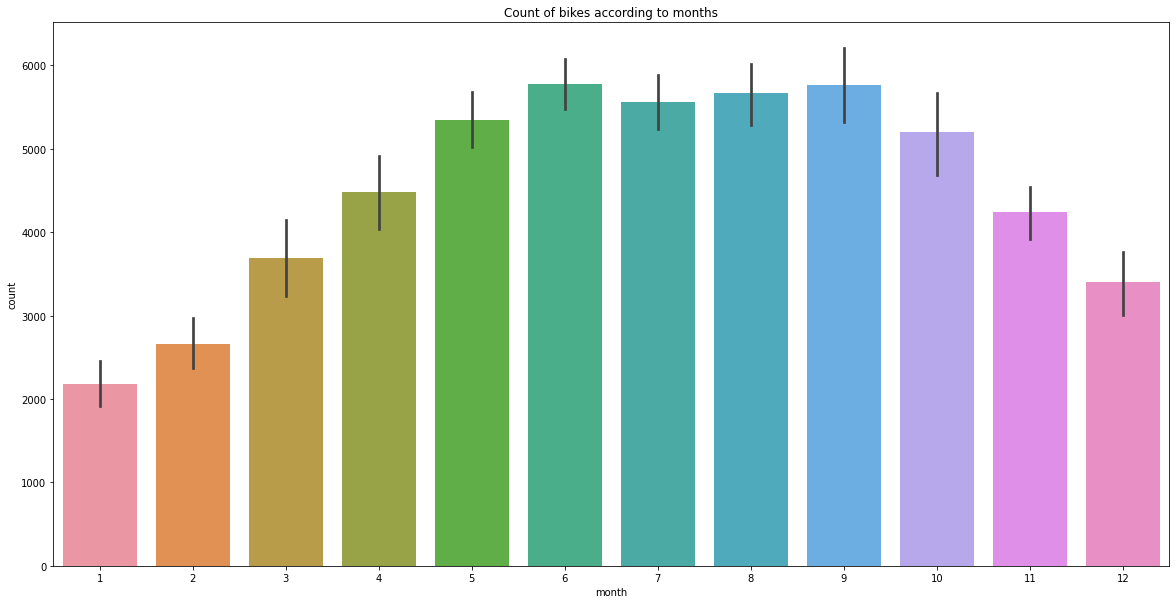

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes according to months')

[Text(0.5, 1.0, 'Count of bikes according to weekday')]

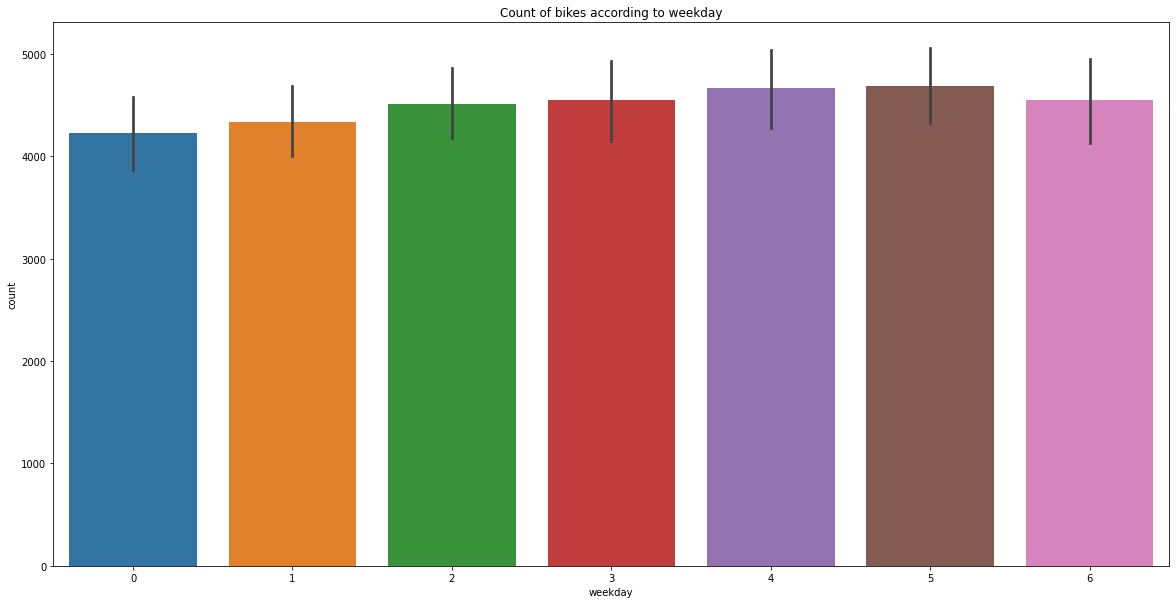

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes according to weekday')

## Coorelation Matrix


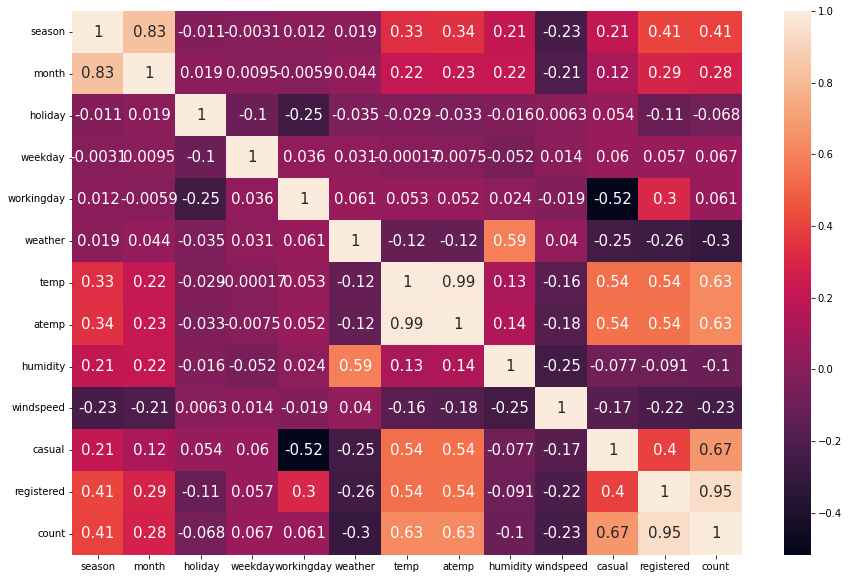

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [ ]:
# dependent and independent varaibles
X = df.iloc[:500, 2:-1].values
y = df.iloc[:500, -1].values

In [ ]:
# test and training split of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicting x_test
y_predict = lr.predict(X_test)

for i in range(0, len(y_predict)):
  print(y_test[i], y_predict[i])

2227 2226.999999999999
4713 4713.0
4563 4563.0
6230 6230.0
6460 6460.0
1204 1203.9999999999986
3717 3716.999999999999
6296 6296.0
3915 3915.0000000000005
5312 5312.000000000001
5204 5204.0
1842 1841.9999999999986
4075 4075.0000000000014
4570 4570.0
4835 4835.0
3068 3068.0000000000005
6398 6398.000000000002
3068 3068.000000000001
5342 5342.0
1712 1712.0000000000002
3840 3840.0000000000005
1951 1950.9999999999982
4634 4634.0
3204 3204.0
1815 1814.9999999999993
6312 6312.000000000001
981 981.0000000000005
2236 2235.9999999999986
3141 3141.0
4758 4757.999999999999
3423 3422.9999999999986
4595 4595.000000000001
4433 4433.0
4086 4085.9999999999995
3598 3598.0000000000005
6273 6273.0
4205 4205.000000000001
5102 5102.000000000001
3750 3750.000000000001
1115 1114.9999999999986
3663 3663.0000000000005
2115 2115.0
2802 2802.0
4780 4780.0
3239 3239.0
801 800.9999999999991
4845 4845.0
1607 1607.0
5062 5062.000000000001
2162 2161.9999999999995
2999 2999.0000000000005
4010 4009.9999999999995
3190 319

In [ ]:
# r2 score, mse, rmse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_predict)
print("r2 socre is ", score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_predict))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_predict)))

r2 socre is  1.0
mean_sqrd_error is  5.831623318498845e-25
root_mean_squared error of is  7.636506608717657e-13


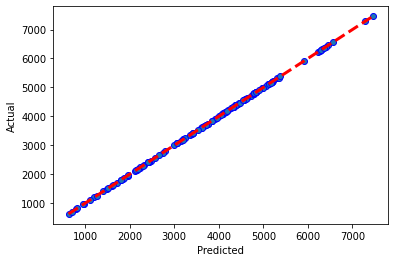

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_predict, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()